In [1]:
from fastai.text import TextLMDataBunch as lmdb, load_data
from fastai.text.learner import language_model_learner
from fastai.text.models import AWD_LSTM
from fastai.callbacks import EarlyStoppingCallback, SaveModelCallback, ReduceLROnPlateauCallback, CSVLogger
from fastai.text.models import AWD_LSTM
from fastai.train import ShowGraph
import pandas as pd
from pathlib import Path

In [2]:
path = Path('lang_model/')
path.absolute()

PosixPath('/ds/hamel/mdtokenizer/notebooks/lang_model')

# 1. Load DataBunch

You have to redefine or import any custom you defined in the last step, because the data bunch is going to look for that.

In [3]:
def pass_through(x):
    return x

In [4]:
data_lm = load_data(path, bs=128)

# 2. Instantiate Language Model

We are going to use the `awd_lstm` with the default parameters listed in the config file below:

In [5]:
from fastai.text.models import Transformer

In [6]:
learn = language_model_learner(data=data_lm,
                               arch=AWD_LSTM,
                               pretrained=False)

# 3. Train Language Model

### Find the best learning rate

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


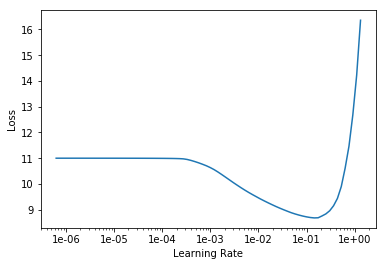

In [8]:
learn.recorder.plot()

In [ ]:
best_lr = 1e-2 * 2

#### Define callbacks

In [9]:
escb = EarlyStoppingCallback(learn=learn, patience=5)
smcb = SaveModelCallback(learn=learn)
rpcb = ReduceLROnPlateauCallback(learn=learn, patience=3)
sgcb = ShowGraph(learn=learn)
csvcb = CSVLogger(learn=learn)

callbacks = [escb, smcb, rpcb, sgcb, csvcb]

In [10]:
from fastai.distributed import *

In [11]:
learn.to_parallel()

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (16385650 items)
x: LMTextList
xxbos xxxfldtitle xxunk throws exception when adding product via xxup api xxxfldbody xxmaj if xxmaj google xxmaj contents xxmaj experiments is enabled , adding a product using the xxxcdb xxup v1 / products / xxxcde endpoint causes xxunk xxxfilepath line 117 to throw xxxcdb invalidargumentexception xxxcde . xxmaj with contents experiments disabled the product add completes successfully . xxmaj example valid request json : 
  xxxcdb " product " : xxxjson 
  xxxcde,xxbos xxxfldtitle xxmaj grafana xxmaj kairosdb xxmaj top n rows xxxfldbody xxmaj when xxmaj grafana pulls the data it shows all the rows returned by the query , so can we please have a query option with something like xxunk ? xxmaj so we can only show limited number of rows on xxmaj grafana unlike now it just gets and shows everything . i have also requested a xxup ui option with xxmaj grafana guys where we can choose the number of rows we wa

In [ ]:
learn.fit_one_cycle(cyc_len=1,
                    max_lr=1e-3,
                    tot_epochs=10,
                    callbacks=callbacks)

epoch,train_loss,valid_loss,accuracy,time


In [13]:
learn.path

PosixPath('lang_model_test')